# Table of Contents
 <p><div class="lev1"><a href="#Jupyter-notebooks"><span class="toc-item-num">1&nbsp;&nbsp;</span>Jupyter notebooks</a></div><div class="lev1"><a href="#Instructions"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instructions</a></div><div class="lev1"><a href="#matplotlib"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>matplotlib</code></a></div><div class="lev1"><a href="#seaborn"><span class="toc-item-num">4&nbsp;&nbsp;</span><code>seaborn</code></a></div><div class="lev1"><a href="#numpy"><span class="toc-item-num">5&nbsp;&nbsp;</span><code>numpy</code></a></div><div class="lev1"><a href="#pandas"><span class="toc-item-num">6&nbsp;&nbsp;</span><code>pandas</code></a></div><div class="lev1"><a href="#folium"><span class="toc-item-num">7&nbsp;&nbsp;</span><code>folium</code></a></div><div class="lev1"><a href="#sklearn"><span class="toc-item-num">8&nbsp;&nbsp;</span><code>sklearn</code></a></div><div class="lev1"><a href="#Missingno"><span class="toc-item-num">9&nbsp;&nbsp;</span><code>Missingno</code></a></div><div class="lev1"><a href="#pivottablejs"><span class="toc-item-num">10&nbsp;&nbsp;</span><code>pivottablejs</code></a></div><div class="lev1"><a href="#pandas_profiling"><span class="toc-item-num">11&nbsp;&nbsp;</span><code>pandas_profiling</code></a></div><div class="lev1"><a href="#ipywidgets"><span class="toc-item-num">12&nbsp;&nbsp;</span><code>ipywidgets</code></a></div><div class="lev1"><a href="#tqdm"><span class="toc-item-num">13&nbsp;&nbsp;</span><code>tqdm</code></a></div><div class="lev1"><a href="#mpld3"><span class="toc-item-num">14&nbsp;&nbsp;</span><code>mpld3</code></a></div>

# Jupyter notebooks

If you are new to Jupyter notebooks, take a look around! There is a `user interface tour` under the `help` dropdown as well as some other useful links. 

# Instructions

* Try to run all the cells in this notebook. 
* If you get errors, still try to run the other sections. There are limited dependencies. 
* At least run all of the cells with `import` in the them. 
* The html file in this directory, `test-my-environment.html` is what your notebook should look like if it runs successfully. 
* Take note of which packages don't load and feel free to post in the slack channel relevant to your OS (#macos, #linux, or #windows) the errors you are getting. 
* If you get errors, make sure to sign up for an account on https://notebooks.azure.com/ (see e-mail and repo README for more instructions)

# `matplotlib`

You want to issue the first command `%matplotlib inline` typically before all other commands.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

from matplotlib import pyplot as plt

Assuming that worked, let's see if we can plot something and see it in the notebook: 

In [2]:
plt.plot(range(10),range(10));

It won't be very exciting but you should now see a figure with a line drawn above ^^

# `seaborn`

`seaborn` replaces a lot of ugly defaults in `matplotlib` and makes plotting nice figures easier. 

In [3]:
import seaborn as sns
sns.set_context("poster", font_scale=1.3)

In [4]:
sns.plt.plot(range(10), range(10));

You should now see the same figure as with matplotlib but formatted somewhat more nicely. 

# `numpy`

`numpy` helps us do math good and other stuff good too. Try importing it. 

In [5]:
import numpy as np

Let's try generating some random numbers.

In [6]:
np.random.rand(10)

array([ 0.64743918,  0.68473214,  0.98078799,  0.01269899,  0.12676797,
        0.51236094,  0.34164141,  0.14934016,  0.38175149,  0.39859722])

The above should produce an [*array*](https://docs.scipy.org/doc/numpy/user/quickstart.html) with 10 random numbers.

In [7]:
import os, sys
import warnings
warnings.filterwarnings('ignore')


# `pandas`  

We will be using `pandas` wrangle our data.

In [8]:
import pandas as pd

In [9]:
data = pd.DataFrame([[1,2,3],[4,5,6]], 
                    columns=['a','b','c'], 
                    index=['one','two'])
data.head()

a  b  c
one  1  2  3
two  4  5  6

The above should output the first five rows (or the *head*) of a `pandas` dataframe holding the dataset held within the `aquastat-world-long.csv`. 

# `folium` 

We will be looking at some data on maps so let's make sure folium works.

In [10]:
import folium

In [11]:
map = folium.Map(location=[45.528163,-122.6643382], zoom_start=16,
                     width=1200, height=600)

In [12]:
map

You should now see above a map of where you are **right** now... creepy. Okay, actually, it's only showing where you are if you're already at PyCon! 

# `sklearn`

We will use the `sklearn` package for doing some more advanced exploration of high-dimensional data. 

In [13]:
from sklearn import datasets

In [14]:
iris_data = datasets.load_iris()

In [15]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target

In [16]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

# `Missingno`

We will use the [`missingno`](https://github.com/ResidentMario/missingno) package to assess missing data. 

In [17]:
import missingno as msno

In [18]:
msno.bar(df)

You should see a bar plot above. Don't worry about what it means right now! 

# `pivottablejs`

In [19]:
import pivottablejs

In [20]:
pivottablejs.pivot_ui(df)

# `pandas_profiling`

In [21]:
import pandas_profiling

In [22]:
pandas_profiling.ProfileReport(df)

# `ipywidgets`

We can use `ipywidgits` to create interactive outputs. Before being able to use `ipywidgets` you need to have already run the following from the command line (as was instructed in the repo README): 

`jupyter nbextension enable --py --sys-prefix widgetsnbextension`

In [23]:
import ipywidgets as widgets

In [24]:
slider = widgets.IntSlider(min=0, max=10,value=5, description='Line width:')

In [25]:
def plot(x, y, linewidth=1):
    fig, ax = plt.subplots(figsize=(8,6))
    plt.plot(x, y, linewidth=linewidth)
    plt.close()
    return fig

In [26]:
widgets.interact(plot, x=widgets.fixed(range(10)), 
                 y=widgets.fixed(range(10)),
                 linewidth=slider);

# `tqdm`

`tqdm` is nice for monitoring how long your `for` loops are taking. 

In [27]:
from tqdm import tqdm

In [29]:
import time
test = []
for i in tqdm(range(50)):
    time.sleep(0.05)
    test.append(i)

100%|██████████| 50/50 [00:02<00:00, 18.73it/s]


In [30]:
clear test

In [31]:
import mpld3

# `mpld3`

`mpld3` allows for some nice interactive functionality using D3. We will just run an [example](https://mpld3.github.io/examples/html_tooltips.html) from the `mpld3` repo. 

In [32]:
import mpld3
from mpld3 import plugins

In [33]:
mpld3.enable_notebook()

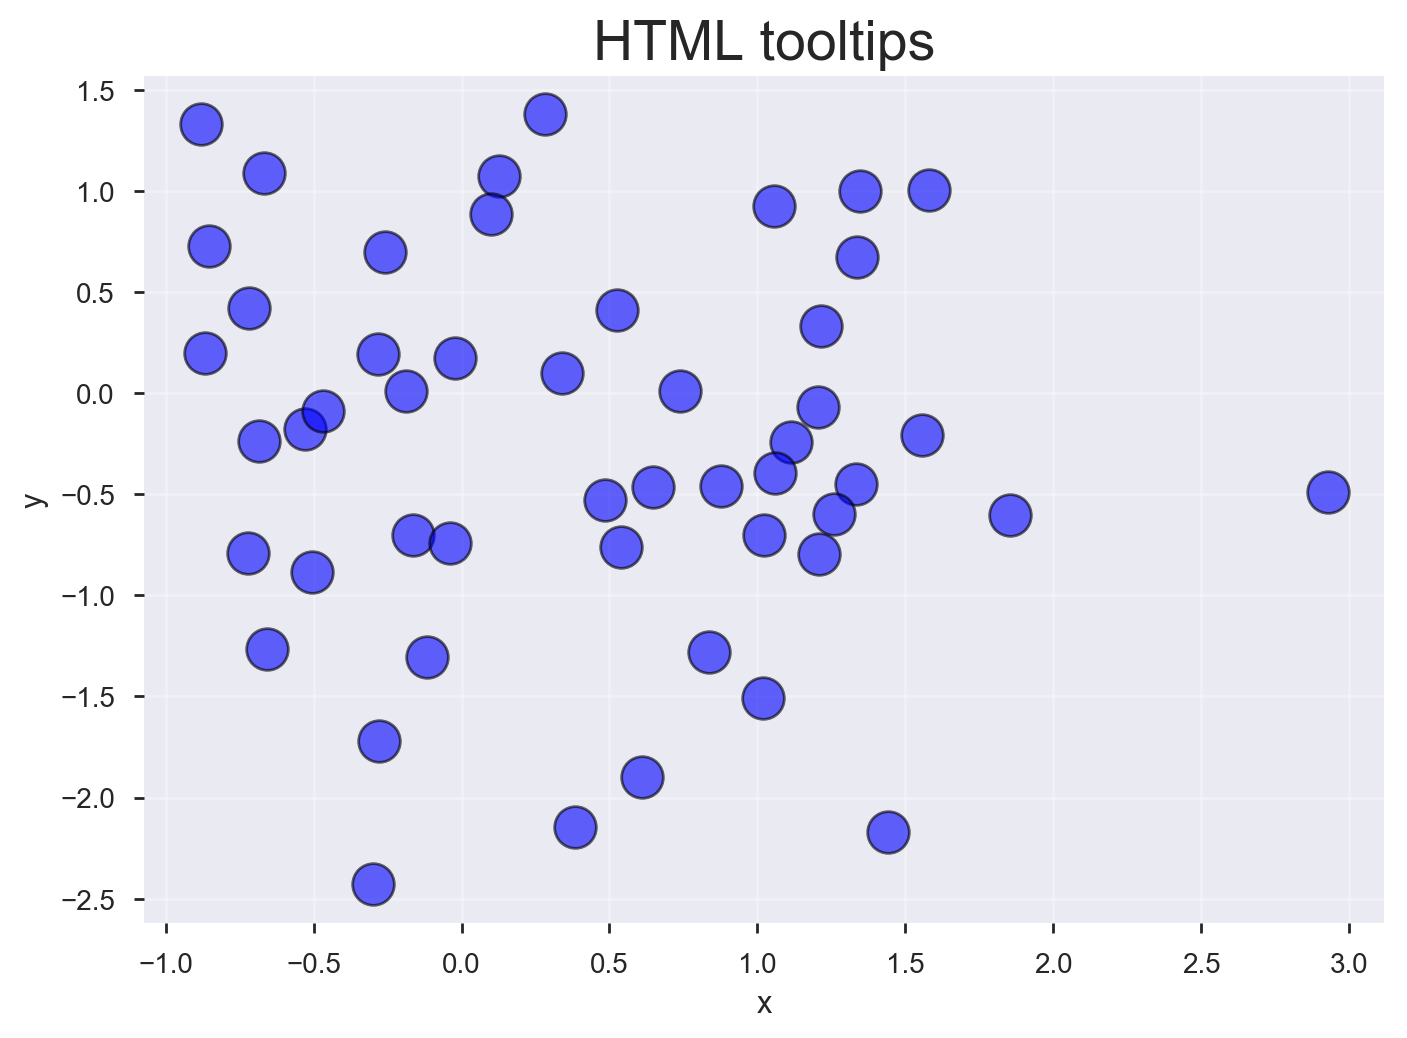

In [34]:
fig, ax = plt.subplots()
ax.grid(True, alpha=0.3)

N = 50
df = pd.DataFrame(index=range(N))
df['x'] = np.random.randn(N)
df['y'] = np.random.randn(N)
df['z'] = np.random.randn(N)

labels = []
for i in range(N):
    label = df.ix[[i], :].T
    label.columns = ['Row {0}'.format(i)]
    # .to_html() is unicode; so make leading 'u' go away with str()
    labels.append(str(label.to_html()))

points = ax.plot(df.x, df.y, 'o', color='b',
                 mec='k', ms=15, mew=1, alpha=.6)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HTML tooltips', size=20)

tooltip = plugins.PointHTMLTooltip(points[0], labels,
                                   voffset=10, hoffset=10)
plugins.connect(fig, tooltip)